In [1]:

import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix


pengUrl = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"

#pengContent = requests.get(pengUrl).content

pengData = pd.read_csv(pengUrl, header=0)


species = pengData['species'].values
# island = pengData['island'].values
billLengthMM = pengData['bill_length_mm'].values
# billDepthMM = pengData['bill_depth_mm'].values
flipperLengthMM = pengData['flipper_length_mm'].values
# bodyMassG = pengData['body_mass_g'].values



In [2]:
maskOne = np.isnan(billLengthMM)
maskTwo = np.isnan(flipperLengthMM)
X = np.column_stack((billLengthMM[~maskOne & ~maskTwo], flipperLengthMM[~maskOne & ~maskTwo]))
# print(X)
print(X.ndim)

Y = species[~maskOne & ~maskTwo]
Y = np.where(Y == "Adelie", 0, np.where(Y == "Gentoo", 1, 2))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
# print(Y)

2


In [3]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0)

([], [])

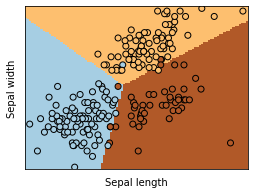

In [4]:
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

In [5]:
def confuse(pred, actual, confusion):
  for pre, act in zip(pred, actual):
    confusion[act][pre] += 1
  # print(confusion)

def confPct(confusion):
  return ((confusion * 100) / (np.sum(confusion))).round(2)

def pctCorrect(pct):
  return pct[0][0]+pct[1][1] + pct[2][2]

In [6]:
conf = np.zeros((3,3))
confuse(logreg.predict(X_test), Y_test, conf)
print("   0  1  2")
print('0',conf[0])
print('1',conf[1])
print('2',conf[2])

pct = confPct(conf)
print(pct)
print(pctCorrect(pct))




   0  1  2
0 [55.  0.  4.]
1 [ 0. 39.  1.]
2 [ 1.  0. 20.]
[[45.83  0.    3.33]
 [ 0.   32.5   0.83]
 [ 0.83  0.   16.67]]
95.0
